<a href="https://colab.research.google.com/github/danielsparing/colab-duckdb-spatial-cookbook/blob/pc/notebooks/gdal_with_duckdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***TLDR:*** https://duckdb.org/docs/stable/core_extensions/spatial/gdal

While for larger or more complex files you might need to explicitly install GDAL (TODO: link) and use e.g. `ogr2ogr`, for small-to-medium examples, it is remarkable how easily DuckDB can use GDAL to open geospatial files.

# Setup

In [ ]:
import duckdb

duckdb.sql("install spatial; load spatial")

Pick a GeoPackage file as an example (these are Dutch administrative boundaries):

In [ ]:
!wget "https://service.pdok.nl/kadaster/bestuurlijkegebieden/atom/v1_0/downloads/BestuurlijkeGebieden_2025.gpkg"

In [ ]:
duckdb.sql(f"SELECT * FROM 'BestuurlijkeGebieden_2025.gpkg' limit 1")

Note at the top how the `geom` column is actually automatically interpreted as type `geometry`.

But this is not everything! The file above actually contains multiple layers, and we can unpack them all with DuckDB:

In [ ]:
layers = duckdb.sql(
        f"""select unnest(layers).name layer from st_read_meta('BestuurlijkeGebieden_2025.gpkg')"""
    ).df()

layers

So now let's pick another layer:

In [ ]:
duckdb.sql("SELECT * FROM st_read('BestuurlijkeGebieden_2025.gpkg', layer='provinciegebied') limit 1")

# Advanced: visualize

Visualization is the topic of another notebook, but all these coordinates above really are asking for a map, so here you go:

In [ ]:
!pip install lonboard --quiet

from lonboard import viz

In [ ]:
query = duckdb.sql("""
SELECT * exclude(geom), st_aswkb(st_transform(geom, 'EPSG:28992', 'OGC:CRS84')) geom
FROM st_read('BestuurlijkeGebieden_2025.gpkg', layer='gemeentegebied')
""")

In [ ]:
viz(query)

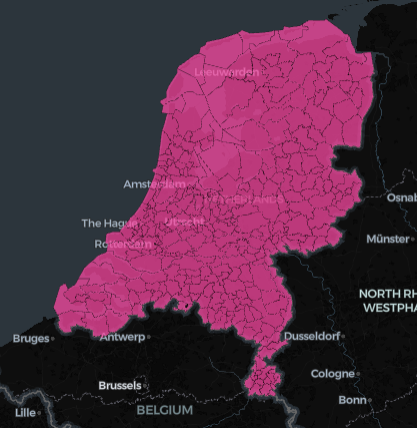